Homework 5 - Google Trends
===

*Wesley Galvão*

*junho, 2020*

Obs: Algumas vezes o chunck gera um erro, mas basta executar novamente que ele estabelece a conexão. 


In [79]:
# Packages installation
# install.packages(c("gtrendsR", "ggplot2", "dplyr", "patchwork", "ggwordcloud", "maps", "ggmap", "forcats"))
# Packages loading
library(gtrendsR)
library(ggplot2)
library(dplyr)
library(patchwork)
library(ggwordcloud)
library(forcats)
options(repr.plot.width = 14, repr.plot.height = 10) #Control the plot size

## Interesse pelo termo Máscara
 
Vamos analisar o interesse pela palavra "máscara" e os termos relacionados nos . A análise será feita com dados dos últimos 3 meses, visto que há um esperado crescimento pela busca dessa palavra devido às ciscunstâncias atuais. 

In [47]:
query = "máscara"
location = c("BR")
period = c("today 3-m")

mascara_query = gtrends(query, geo = location, time = period)
mascara_related = mascara_query$related_queries
head(as_tibble(mascara_related))

subject,related_queries,value,geo,keyword,category
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
100,top,fazer máscara,BR,máscara,0
89,top,máscara tecido,BR,máscara,0
87,top,máscara como fazer,BR,máscara,0
86,top,como fazer,BR,máscara,0
83,top,máscara de tecido,BR,máscara,0
75,top,mascara,BR,máscara,0


Podemos visualizar os termos com maior relação à palavra de interesse pelo gráfico `word cloud`, onde as palavras são evidenciadas pelo seu grau de afinidade.

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in wordcloud_boxes(data_points = points_valid_first, boxes = boxes, :
“Some words could not fit on page. They have been placed at their original positions.”


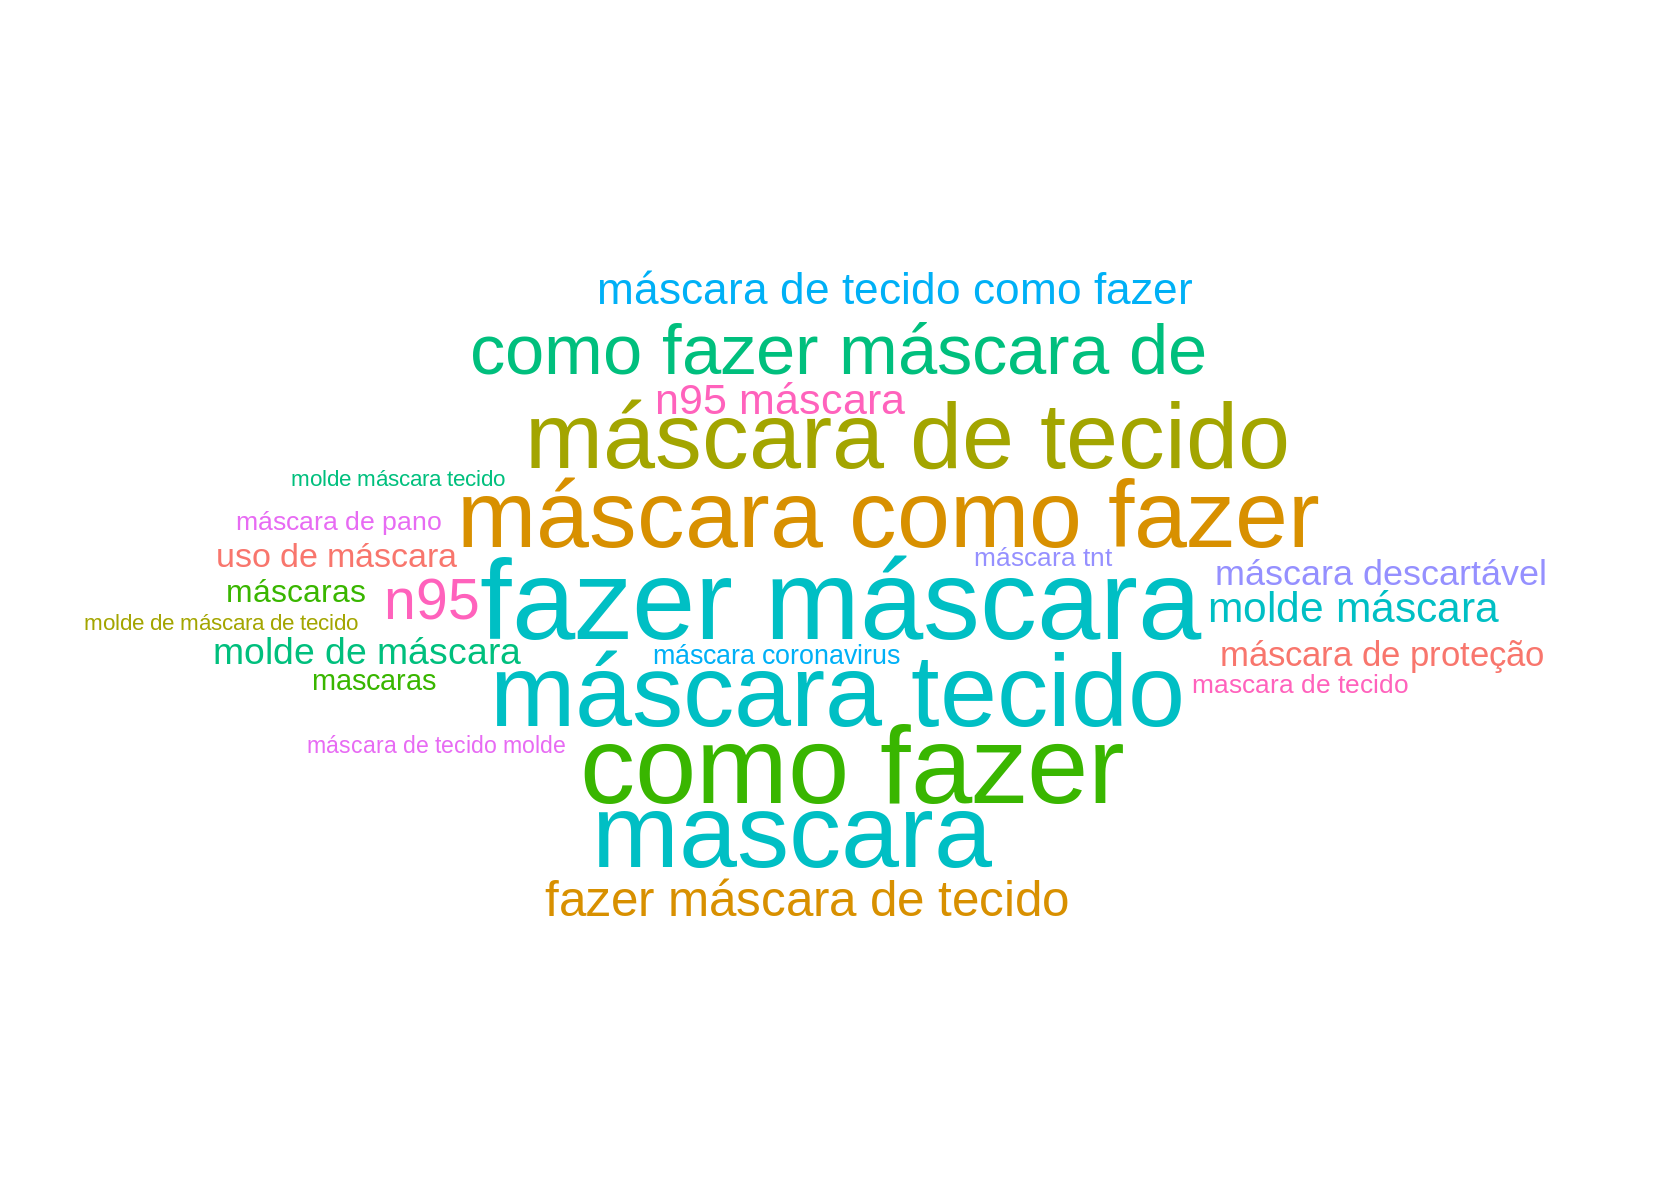

In [80]:
set.seed(42)
ggplot(
  mascara_related,
  aes(
    label = value, size = as.numeric(subject),
    color = factor(sample.int(10, nrow(mascara_related), replace = TRUE)),
  )
) +
  geom_text_wordcloud_area(shape =  "diamond") +
  scale_size_area(max_size = 24) +
  theme_minimal()


Vamos agora fazer uma análise gráfica sobre a palavra "máscara" e os três termos com maior relação, sendo eles: "fazer máscara", "máscara tecido" e "máscara como fazer"

In [85]:
query = c("máscara", "fazer máscara", "máscara tecido", "máscara como fazer")
location = c("BR")
period = c("today 3-m")

mascara_rltd_words = gtrends(query, geo = location, time = period)
mascara_rltd_over_time = mascara_rltd_words$interest_over_time

Através do gráfico de interesse ao longo do tempo, podemos visualizar e comparar o grau de interesse entre o termo principal e os seus termos com maior relação. Quanto mais próximo de 100, maior o interesse. 

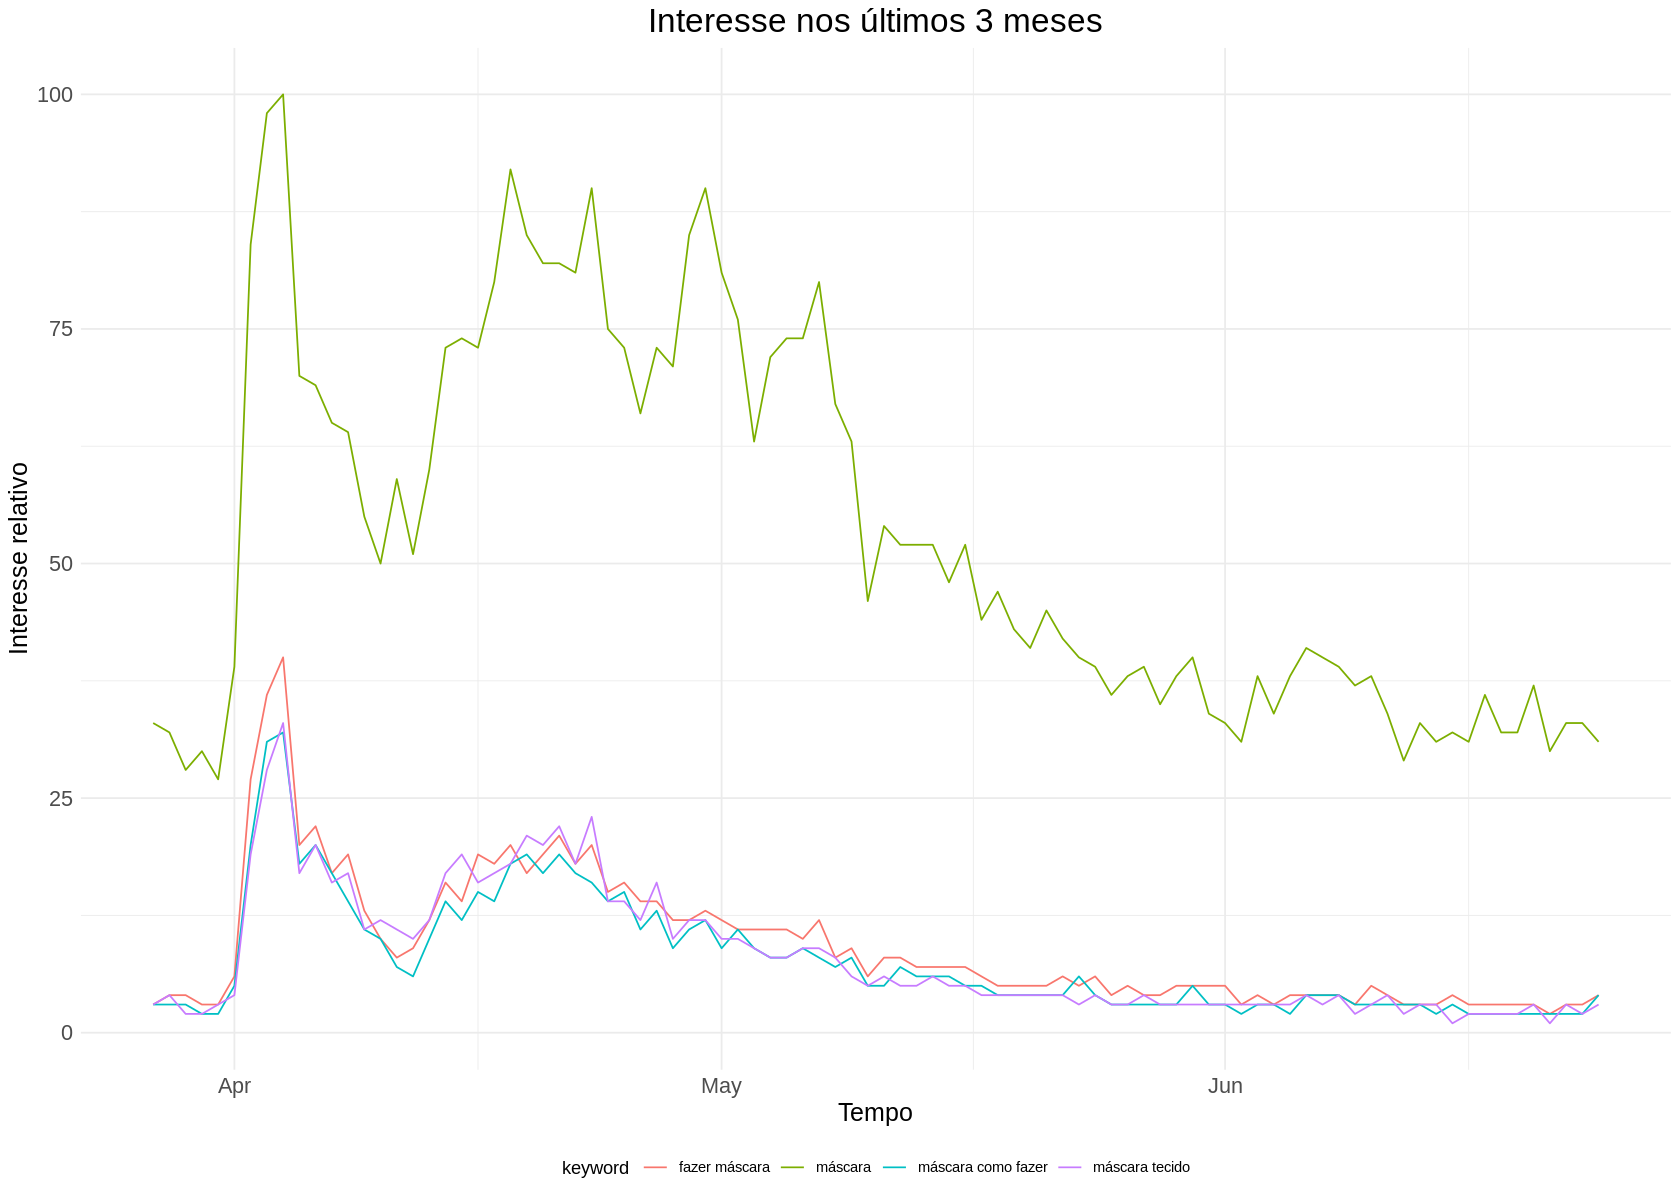

In [96]:
ggplot(data = mascara_rltd_over_time) + aes(x = date, y = hits, color = keyword) + 
  geom_line() +
  labs(title = "Interesse nos últimos 3 meses", x = "Tempo", y = "Interesse relativo") + 
  theme_minimal() + 
  theme(legend.position = 'bottom', 
    axis.text = element_text(size = 13),
    plot.title = element_text(hjust=0.5, size = 20), 
    axis.title = element_text(size = 15))

Por fim, vamos ranquear o interesse pelos 4 termos analisados por estados do território nacional. 

In [25]:
mascara_rltd_region = mascara_rltd_words$interest_by_region
head(mascara_rltd_region)

,location,hits,keyword,geo,gprop
,<chr>,<int>,<chr>,<chr>,<chr>
1,State of São Paulo,100,máscara,BR,web
2,State of Maranhão,99,máscara,BR,web
3,State of Bahia,98,máscara,BR,web
4,State of Rio de Janeiro,97,máscara,BR,web
5,State of Minas Gerais,95,máscara,BR,web
6,State of Alagoas,94,máscara,BR,web


Uma vez que temos o subset, temos o gráfico resultante. 

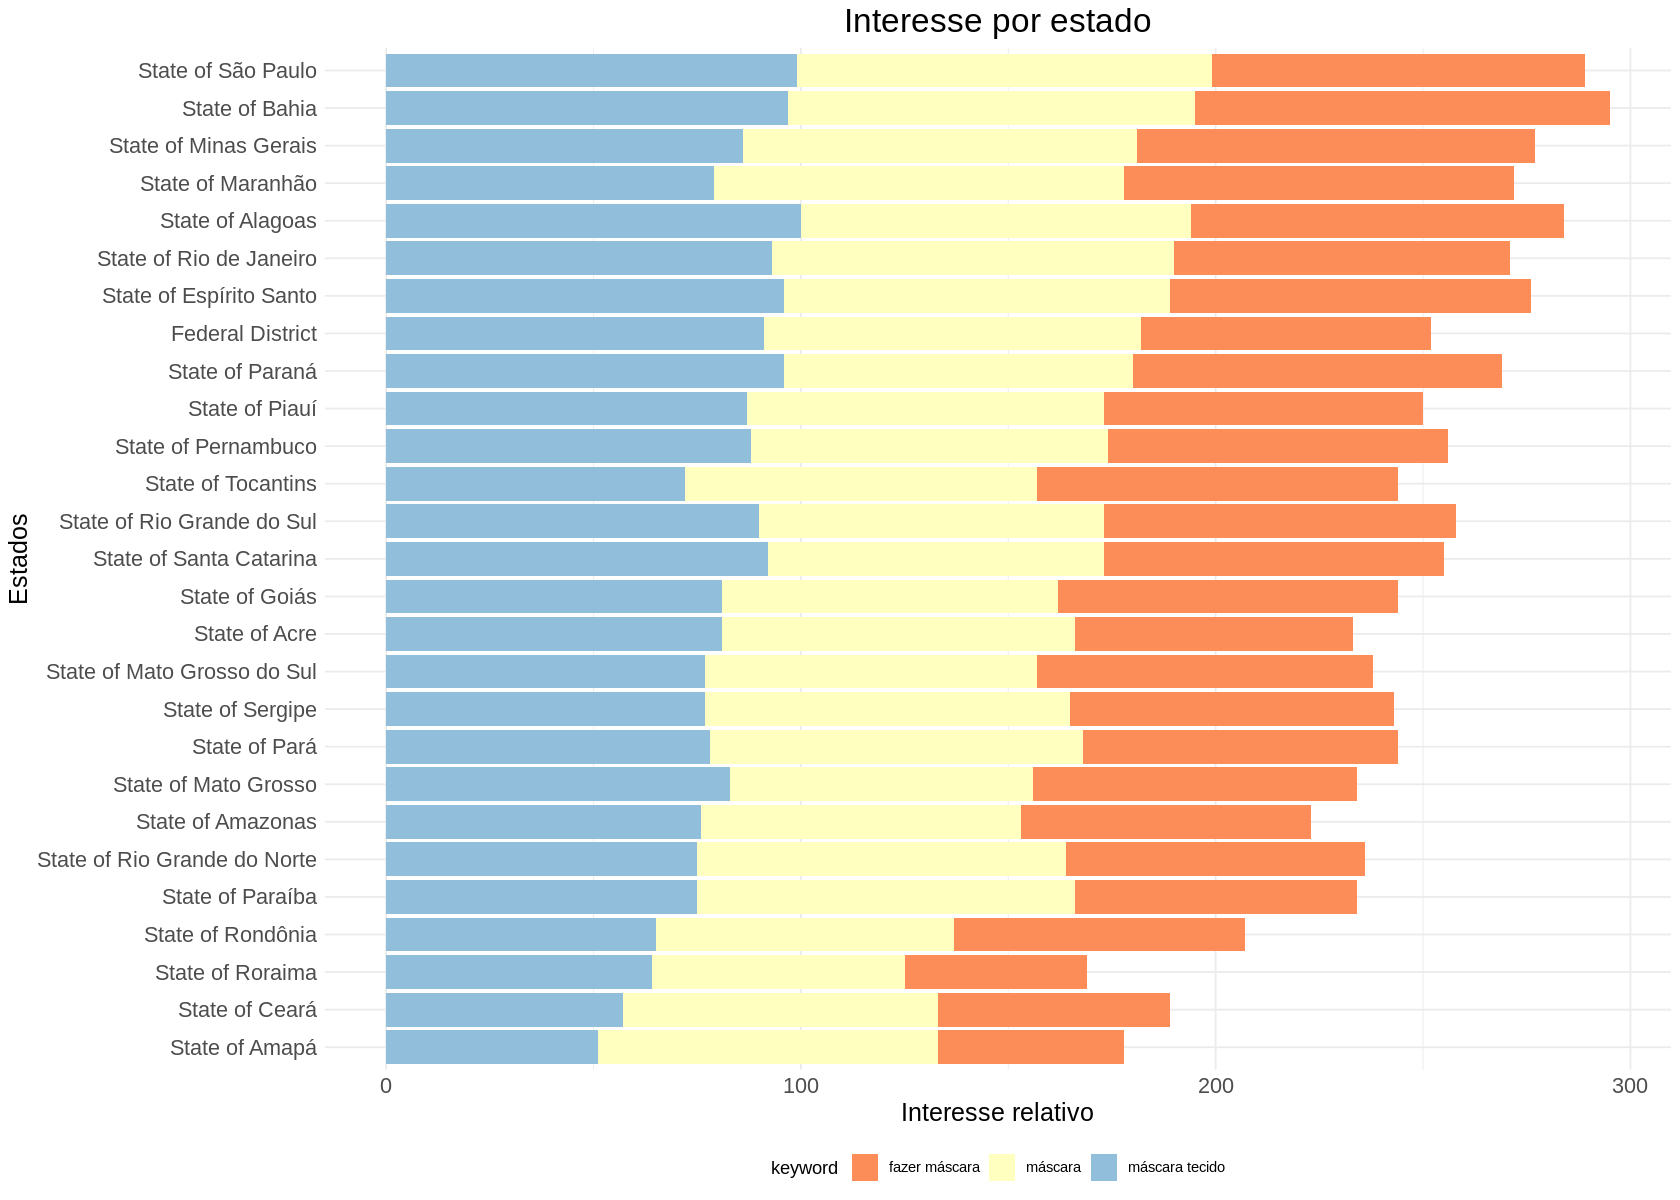

In [106]:
mascara_rltd_region %>%
  mutate(name = fct_reorder(location, hits)) %>%
  ggplot() + aes(x = name, fill = keyword, weight = hits) + 
    geom_bar() + 
    scale_fill_brewer(palette = "RdYlBu") + 
    labs(title = "Interesse por estado", x = "Estados", y = "Interesse relativo") + 
    theme_minimal() + coord_flip() + 
    theme(legend.position = 'bottom', 
      axis.text = element_text(size = 13),
      plot.title = element_text(hjust=0.5, size = 20), 
      axis.title = element_text(size = 15))

Referências
- http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html
- https://rstudio-pubs-static.s3.amazonaws.com/21395_3c4bfb6f49cd4724ba3c6453663adf95.html
- https://rstudio-pubs-static.s3.amazonaws.com/21395_3c4bfb6f49cd4724ba3c6453663adf95.html
- https://cran.r-project.org/web/packages/ggwordcloud/vignettes/ggwordcloud.html
- https://davetang.org/muse/2018/12/31/visualising-google-trends-results-with-r/
- https://www.storybench.org/mapping-search-data-from-google-trends-in-r/
- https://www.rpubs.com/SurbhiT/520533
- https://www.christopheryee.org/blog/mining-google-trends-data-with-r-featuring-gtrendsr/

